## Probability Distributions

In [1]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

In [2]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

## Uniform Distribution

In [3]:
from scipy.stats import uniform

In [6]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n,loc=start,scale=width)



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

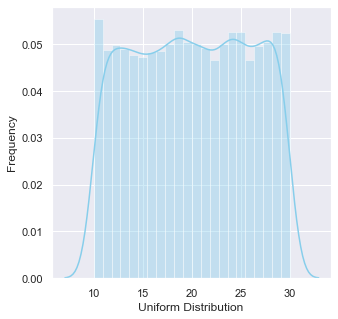

In [11]:
ax = sns.distplot(data_uniform,
                 color = 'skyblue')
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Normal Distribution

In [12]:
from scipy.stats import norm

In [19]:
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

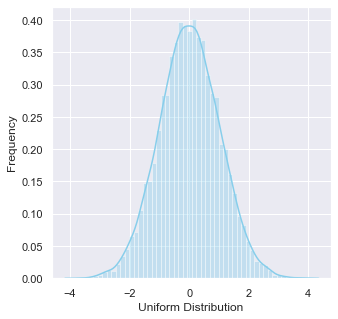

In [20]:
ax = sns.distplot(data_normal,
                 color = 'skyblue')
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Gamma Distribution

In [21]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

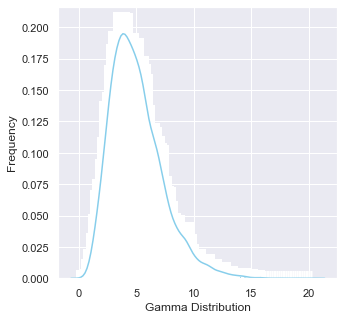

In [22]:
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

## Exponantial Distribution

In [23]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

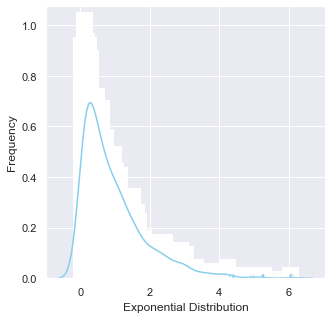

In [24]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Poisson Distribution

In [25]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

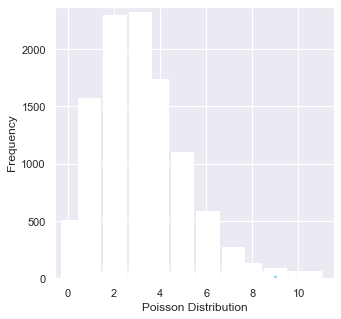

In [26]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Binomial Distribution

In [27]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

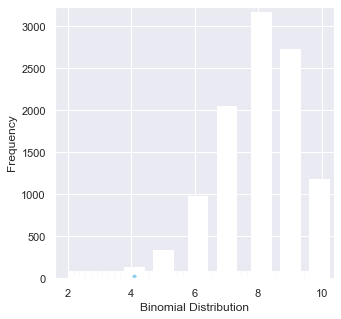

In [28]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

## Bernoulli Distribution

In [29]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

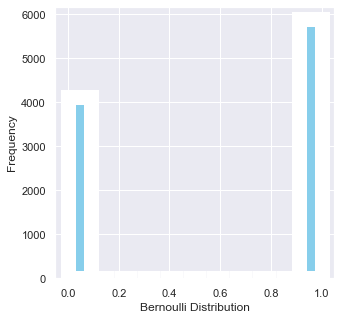

In [30]:
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

## Confidence Interval

In [31]:
import numpy as np

love_soccer_prop = 0.65  # Real percentage of people who love soccer
total_population = 325*10**6  # Total population in the U.S. (325M)
num_people_love_soccer = int(total_population * love_soccer_prop)
num_people_dont_love_soccer = int(total_population * (1 - love_soccer_prop))
people_love_soccer = np.ones(num_people_love_soccer)
people_dont_love_soccer = np.zeros(num_people_dont_love_soccer)
all_people = np.hstack([people_love_soccer, people_dont_love_soccer])
print(np.mean(all_people))

0.65


In [32]:
for i in range(10):
    sample = np.random.choice(all_people, size=1000)
    print('Sample', i, ':', np.mean(sample))

Sample 0 : 0.668
Sample 1 : 0.66
Sample 2 : 0.663
Sample 3 : 0.656
Sample 4 : 0.64
Sample 5 : 0.632
Sample 6 : 0.659
Sample 7 : 0.661
Sample 8 : 0.665
Sample 9 : 0.65


In [33]:
values = []
for i in range(10000):
    sample = np.random.choice(all_people, size=1000)
    mean = np.mean(sample)
    values.append(mean)
print(np.mean(values))

0.6502588


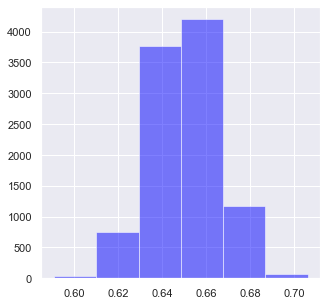

In [34]:
bins = 6

n, bins, patches = plt.hist(values, bins, facecolor='blue', alpha=0.5)
plt.show()

In [35]:
values = []
for i in range(200000):
    sample = np.random.choice(all_people, size=1000)
    mean = np.mean(sample)
    values.append(mean)
print(np.mean(values))

KeyboardInterrupt: 

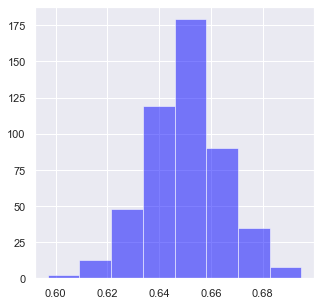

In [36]:
bins = 8

n, bins, patches = plt.hist(values, bins, facecolor='blue', alpha=0.5)
plt.show()

## Other Example of Confidence Intervals

In [38]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

### Generate Data of People's Mass in Pounds

In [39]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})

In [40]:
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


### View Distribution of U.S. People's Mass

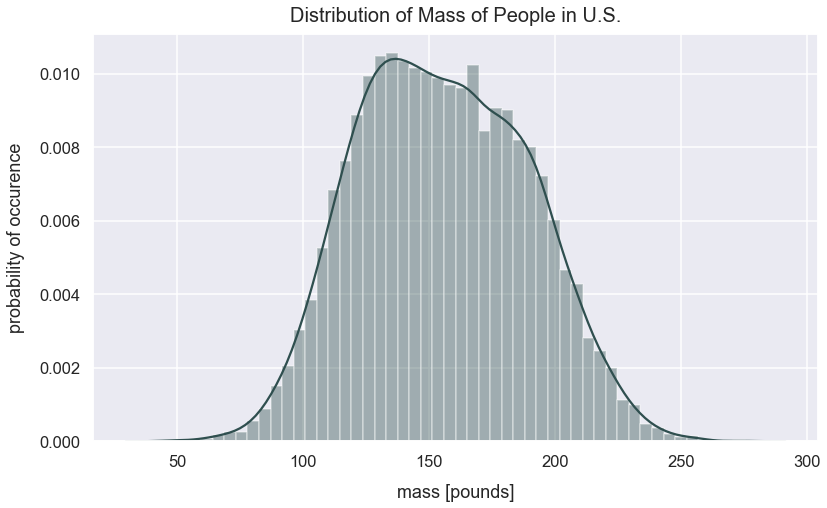

In [41]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

In [42]:
# Calculation Population Mean
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.4232805942338

In [43]:
# Calculate Population Standard Deviation
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
pop_std_dev_mass

33.585190883958624

In [44]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

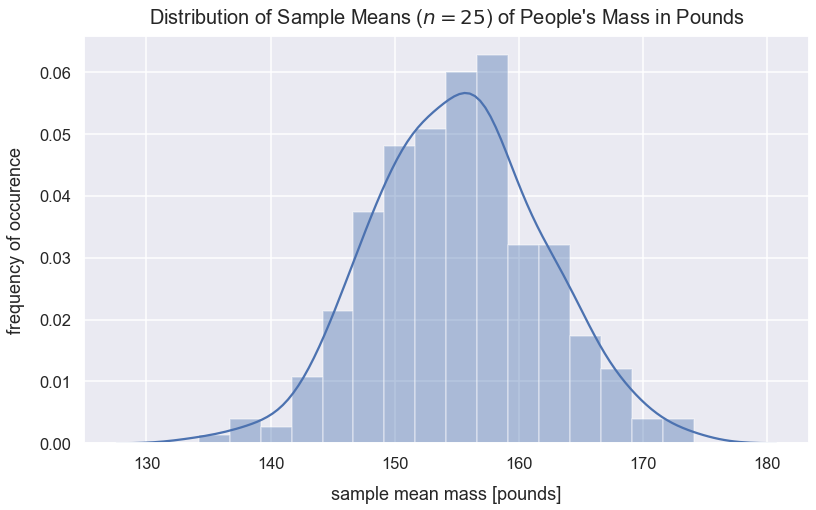

In [45]:
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [46]:
## Calculate median sample mean

median_of_sample_means = np.mean(sample_means)
median_of_sample_means

155.12418330193915

In [47]:
# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

155.12418330193915

In [48]:
pop_mean_mass

155.4232805942338

In [49]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

6.734407481483423

In [50]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791725

In [51]:
std_dev_of_sample_means

6.734407481483423

In [52]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

141.95878847542738

In [53]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

168.28957812845093

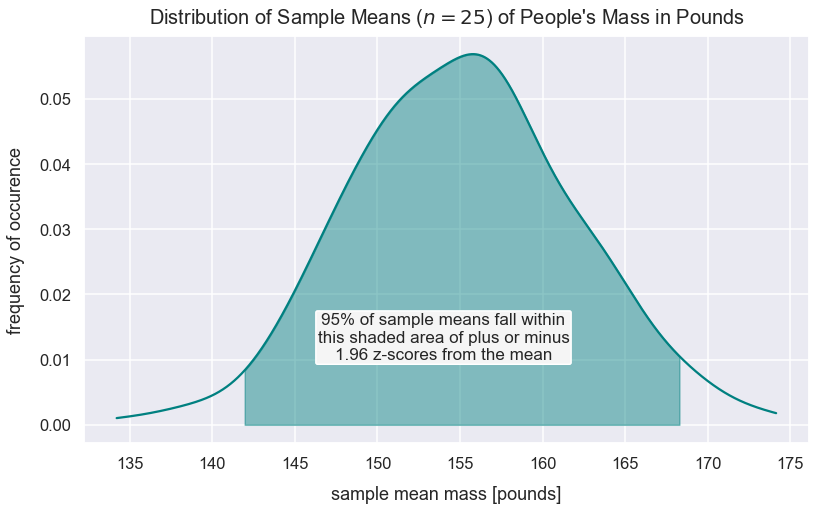

In [54]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.1"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);